In [2]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen

import pandas as pd
import re

In [3]:
from konlpy.tag import Hannanum
from urllib.request import urlopen
from lxml import html
from collections import Counter
import nltk

import random
import pytagcloud      # requires Korean font support
import webbrowser

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
word = pd.read_csv('./teample_1/hankyure_policy_utf.csv', sep=',', encoding='utf-8')
word.head()

,Unnamed: 0,날짜,제목
0,0,2018-11-13,‘예결위 소위 누가 들어가냐’로 왜 난리냐고요?
1,1,2018-11-13,"김성태·김관영 “문 대통령, 돌려막기 인사 사과해야”"
2,2,2018-11-13,"민주당 “손학규, ‘저녁 있는 삶’ 주장하더니 왜 소신 바꿨나”"
3,3,2018-11-13,"청와대 “북, 미사일 기지 폐기 약속한 적 없다” NYT 보도 반박"
4,4,2018-11-13,"이낙연, 2009년 이전 고시원 등 ‘스프링클러 의무화’ 검토 지시"


In [5]:
xyz = list(word['제목'])

In [19]:
words = str()

for i in range(len(xyz)):
    words += xyz[i]

# words

### 트위터로 단어 뽑기

In [20]:
# from konlpy.tag import Hannanum
# from konlpy.tag import Kkma
# from konlpy.tag import Komoran
# from konlpy.tag import Mecab
from konlpy.tag import Twitter

In [9]:
twitter = Twitter()
nouns3 = twitter.nouns(words)
count3 = Counter(nouns3)

C:\Python\Anaconda3-52\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [12]:
tmp_wordsource_policy = count3.most_common()
tmp_wordsource_policy

[('대통령', 986),
 ('문', 722),
 ('북', 491),
 ('한국', 479),
 ('남북', 379),
 ('청와대', 287),
 ('회담', 277),
 ('김정은', 262),
 ('것', 222),
 ('홍준표', 218),
 ('평화', 216),
 ('국회', 207),
 ('민주당', 205),
 ('대표', 190),
 ('평양', 188),
 ('명', 178),
 ('북한', 177),
 ('선언', 177),
 ('포토', 168),
 ('자유', 165),
 ('단', 161),
 ('정치', 157),
 ('의원', 156),
 ('정부', 153),
 ('정상회담', 152),
 ('판문점', 138),
 ('전', 136),
 ('위원장', 128),
 ('합의', 127),
 ('안철수', 126),
 ('안', 122),
 ('미래', 121),
 ('비핵화', 121),
 ('등', 112),
 ('후보', 111),
 ('정상', 110),
 ('국민', 104),
 ('김성태', 103),
 ('때', 99),
 ('첫', 98),
 ('더', 98),
 ('정의당', 98),
 ('당', 97),
 ('중', 96),
 ('장관', 94),
 ('오늘', 93),
 ('선거', 92),
 ('노회찬', 92),
 ('기무사', 91),
 ('문재인', 90),
 ('출마', 90),
 ('한반도', 89),
 ('북미', 89),
 ('대화', 89),
 ('추진', 86),
 ('트럼프', 84),
 ('위', 84),
 ('민주', 84),
 ('고위', 83),
 ('여야', 82),
 ('미국', 79),
 ('평창', 79),
 ('제', 78),
 ('논란', 77),
 ('수', 76),
 ('경제', 76),
 ('보수', 74),
 ('서울', 74),
 ('공동', 73),
 ('개헌', 73),
 ('일', 72),
 ('뒤', 71),
 ('특사', 70),
 ('왜', 69),
 

### (중간)데이터프레임화하기

In [22]:
common_word_policy = pd.DataFrame({'정치단어' : count3.most_common()})

In [23]:
common_word_policy

,정치단어
0,"(대통령, 986)"
1,"(문, 722)"
2,"(북, 491)"
3,"(한국, 479)"
4,"(남북, 379)"
5,"(청와대, 287)"
6,"(회담, 277)"
7,"(김정은, 262)"
8,"(것, 222)"
9,"(홍준표, 218)"


### (중간)데이터프레임화한 것 저장

In [11]:
common_word_policy.to_csv('teample_1/common_word_policy_utf.csv', sep=',', encoding='utf-8')

In [12]:
common_word_policy.to_csv('teample_1/common_word_policy_euc.csv', sep=',', encoding='euc-kr')

## 단어 분류

In [24]:
one_words = []
tow_words = []
etc_words = []
for noun in nouns3:
    if len(noun) == 1:
        one_words.append(noun)
    elif len(noun) == 2:
        tow_words.append(noun)
    else:
        etc_words.append(noun)
        
len(one_words), len(tow_words), len(etc_words)

(7245, 28200, 10409)

In [25]:
one_words = list(set(one_words))
tow_words = list(set(tow_words))
etc_words = list(set(etc_words))

len(one_words), len(tow_words), len(etc_words)

(459, 4796, 2150)

In [26]:
for word in one_words:
    print(word, end='\t')

과	밑	응	맹	업	볼	리	묵	강	주	함	뻔	원	생	봇	점	날	룰	쇄	령	배	흙	김	찬	뿔	렵	인	봉	진	뭐	결	중	액	방	띠	넉	집	안	처	환	모	짓	죄	몇	순	굴	면	두	며	초	욱	추	형	잣	표	판	도	궁	최	명	월	고	뭣	린	각	휙	낮	칼	누	꼽	독	놀	답	때	차	씨	정	품	쪽	러	트	존	융	산	기	군	개	푼	메	평	패	삼	척	케	병	탑	유	뺨	편	휘	설	애	빚	경	갑	건	달	꿀	닌	렀	엘	술	터	앗	파	준	낯	곰	못	워	블	의	킹	난	딜	당	뼘	겨	쾅	핵	량	망	시	칠	쇼	색	간	꽃	격	통	골	탓	옥	닻	비	빈	곧	칙	론	팽	삥	뭉	료	곡	디	악	둘	끼	률	견	손	담	맛	폐	션	값	옆	문	겁	검	좀	곤	버	내	약	괌	웃	롭	팬	홍	컷	팔	벽	곁	쌀	깨	떼	예	류	수	끝	싹	로	을	데	목	왕	종	곪	친	돈	복	마	체	말	쏠	섬	끌	감	직	왜	펜	땀	글	돌	영	거	첫	눈	걸	좌	무	질	짝	위	졸	쟁	새	연	택	채	빛	염	몽	저	롱	스	치	심	항	꼭	온	선	논	단	륭	랩	북	퍼	양	식	놈	쥐	콩	적	네	층	샷	것	꿈	석	번	승	성	더	행	노	국	탈	빼	삶	음	회	댁	짐	톱	계	밸	밤	팁	훅	급	이	엄	톤	책	뼈	육	힘	어	맨	끈	코	태	공	화	황	카	분	낼	게	몫	포	쿨	딸	밥	율	상	덕	폼	늘	혹	듯	용	또	멍	귤	댕	자	청	막	후	겐	역	빅	법	규	권	윤	억	땐	해	숨	속	절	둑	사	귀	드	깜	광	오	창	여	특	획	꽉	민	잉	피	너	호	축	윗	만	열	혜	턱	요	세	젠	겉	현	길	뒤	송	줄	머	보	키	효	옷	제	락	객	금	은	잡	협	입	발	팀	접	퇴	전	범	를	벗	폭	별	묘	합	댐	틀	외	록	쌍	헛	냉	물	총	란	임	샤	숲	구	뜻	찍	백	멸	철	향	땅	부	작	일	몸	년	앞	콜	잠	바	곳	장	겹	재	알	꽤	실	소	투	밖	쑥	득	봄	운	균	확	매	람	침	박	관	뭘	던	나	그	남	반	콸	삭	넋	등	뿐	풀	립	살	움	불	

In [46]:
stop_words = []
sw_time = ['오늘', '어제', '미래', '내일', '시작', '하루', '올해', '오전', '오후', '하루', '이번', '다시', '마지막','개월']
sw_various = ['대통령','한국','청와대','대표','포토','의원','정부','정치','후보','추진','이유','달라','만난','누구','사진','직접','마련','리선']
sw_region = ['서울','대전','대구','부산','울산','광주','제주','제주도']
# stop_words = ['제', '월', '일','조','수','때','그','이','바','및','안']
stop_words.extend(one_words)
stop_words.extend(sw_time)
stop_words.extend(sw_various)
stop_words.extend(sw_region)
len(stop_words)

499

In [47]:
# stop_words 빼기
policy_nouns = [word for word in nouns3 if word not in stop_words]
len(policy_nouns)

34910

In [48]:
policy_nouns[:10]

['결위', '소위', '누가', '난리', '고요', '김성태', '김관영', '돌려막기', '인사', '사과']

In [49]:
policy  = nltk.Text(policy_nouns, name='사회기사')
type(policy), len(policy)

(nltk.text.Text, 34910)

In [50]:
policy.vocab().most_common(100)

[('남북', 379),
 ('회담', 277),
 ('김정은', 262),
 ('홍준표', 218),
 ('평화', 216),
 ('국회', 207),
 ('민주당', 205),
 ('평양', 188),
 ('북한', 177),
 ('선언', 177),
 ('자유', 165),
 ('정상회담', 152),
 ('판문점', 138),
 ('위원장', 128),
 ('합의', 127),
 ('안철수', 126),
 ('비핵화', 121),
 ('정상', 110),
 ('국민', 104),
 ('김성태', 103),
 ('정의당', 98),
 ('장관', 94),
 ('선거', 92),
 ('노회찬', 92),
 ('기무사', 91),
 ('문재인', 90),
 ('출마', 90),
 ('한반도', 89),
 ('북미', 89),
 ('대화', 89),
 ('트럼프', 84),
 ('민주', 84),
 ('고위', 83),
 ('여야', 82),
 ('미국', 79),
 ('평창', 79),
 ('논란', 77),
 ('경제', 76),
 ('보수', 74),
 ('공동', 73),
 ('개헌', 73),
 ('특사', 70),
 ('논의', 68),
 ('대북', 68),
 ('드루', 68),
 ('개혁', 67),
 ('지지율', 67),
 ('수사', 66),
 ('방북', 64),
 ('의혹', 64),
 ('이해찬', 64),
 ('지방선거', 64),
 ('협의', 62),
 ('서울시장', 59),
 ('발언', 58),
 ('야당', 57),
 ('남북정상회담', 57),
 ('회의', 55),
 ('정당', 54),
 ('단독', 54),
 ('방문', 52),
 ('외교', 52),
 ('종전', 51),
 ('공개', 50),
 ('총리', 50),
 ('박근혜', 50),
 ('우리', 50),
 ('훈련', 50),
 ('특검', 50),
 ('인사', 49),
 ('군사', 49),
 ('박원순', 49),
 ('사퇴', 49),
 ('

## 워드클라우드 한글폰트 설정

In [51]:
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [52]:
data = policy.vocab().most_common(1000)
len(data)

1000

In [53]:
data[:10]

[('남북', 379),
 ('회담', 277),
 ('김정은', 262),
 ('홍준표', 218),
 ('평화', 216),
 ('국회', 207),
 ('민주당', 205),
 ('평양', 188),
 ('북한', 177),
 ('선언', 177)]

In [54]:
# data를 딕셔너리 형태로 변환
dict_data = dict(data)
len(dict_data)

1000

### 워드클라우드 그리기

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [56]:
wordcloud = WordCloud(font_path='C:/Windows/Fonts/malgun.ttf',
                      background_color='white'
                     ,relative_scaling =0.2).generate_from_frequencies(dict_data)

(-0.5, 399.5, 199.5, -0.5)

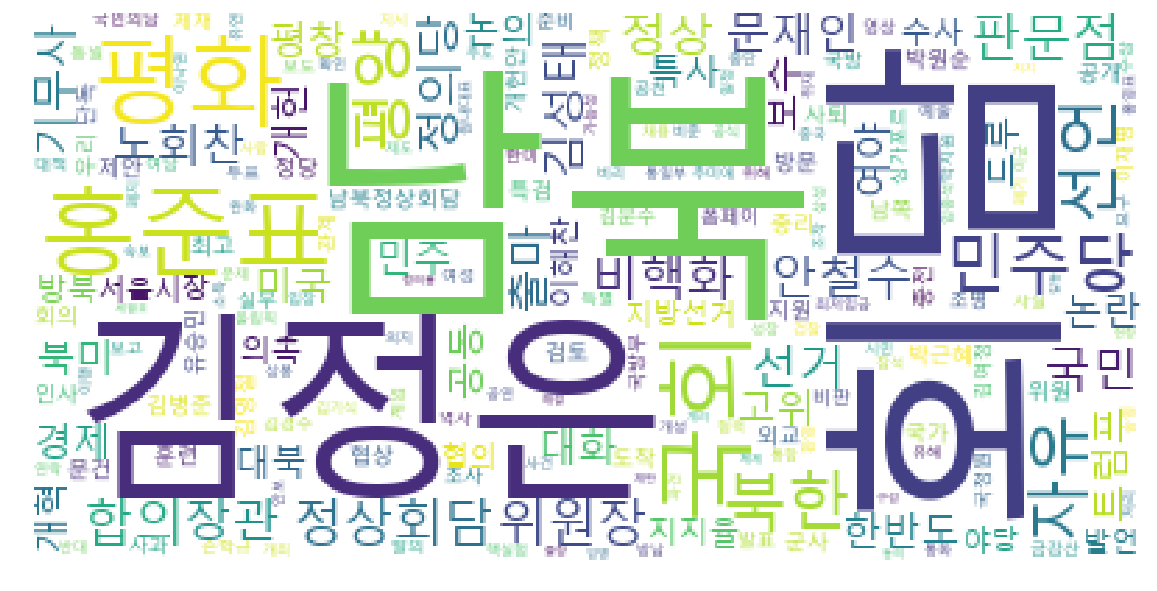

In [57]:
plt.figure(figsize=(20,12))
plt.imshow(wordcloud)
plt.axis('off')

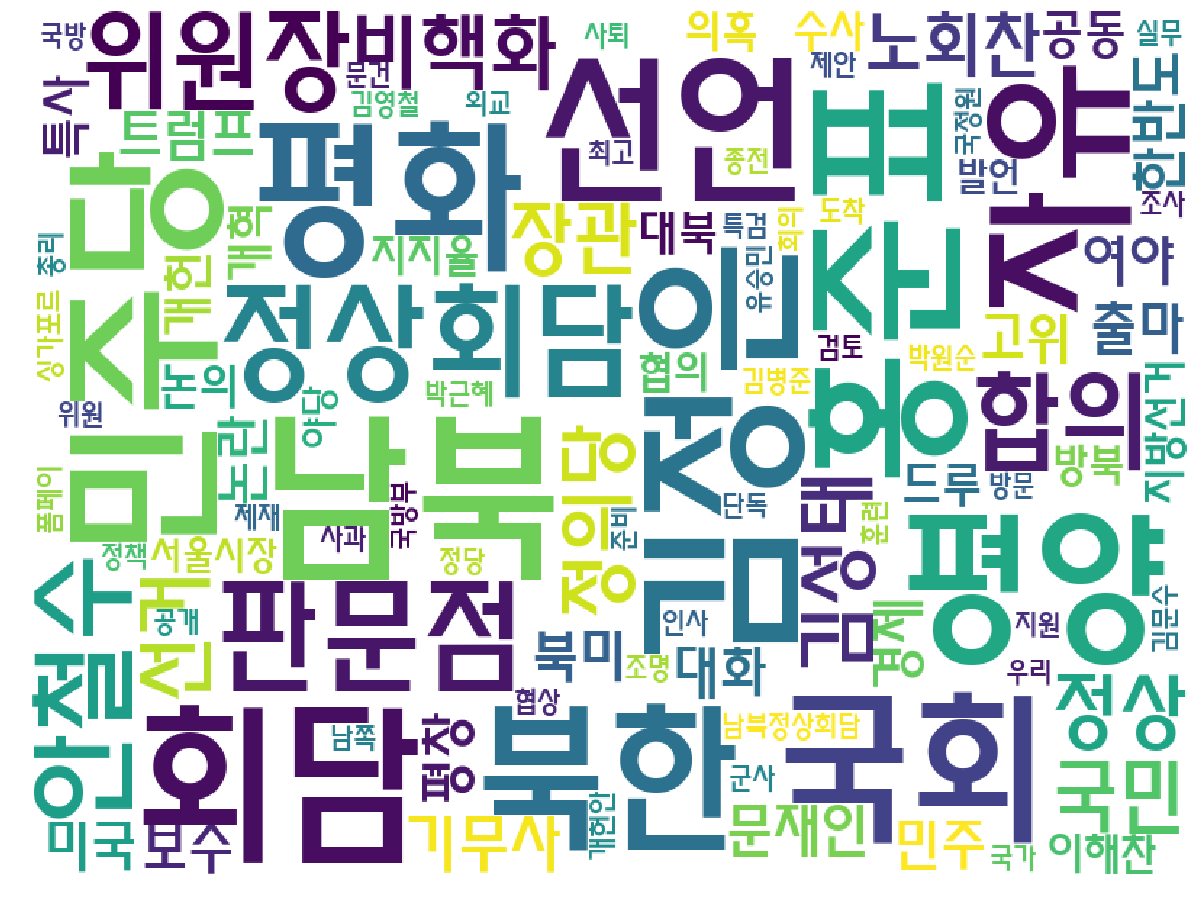

In [58]:
params = {
    "width"            : 800,
    "height"           : 600,
    "min_font_size"    : 2**3, 
    "max_font_size"    : 2**7, 
    "max_words"        : 100,
    "relative_scaling" : 0.2,
    # "font_path"        : 'C:/Windows/Fonts/malgun.ttf',
    "font_path"        : 'C:/Windows/Fonts/HMFMMUEX.TTC',
    "background_color" : 'white',
}

wordcolud = WordCloud(**params)
# wordcolud = wordcolud.generate(text) 
wordcolud = wordcolud.generate_from_frequencies(dict_data) 

save_img = 'teample_1_result/policy_add_stopwords_1.png'

plt.figure(figsize=(24,16))
plt.imshow(wordcolud)
plt.axis('off')
plt.savefig(save_img)